#### Objective of this kernel:
* To implement svm machine learning algorithm
* To save our model 
* To  measure the accuracy of the model

## Importing our libraries 

In [14]:
import numpy as np

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the "../output/" directory.
import os

for dirname, _, filenames in os.walk('./output/'):
    
    for filename in filenames:
        
        print(os.path.join(dirname, filename))
        
# Any results you write to the current directory are saved as output.

./output/linearmodel.pickle
./output/naive_bayes.pickle
./output/KNNmodel.pickle
./output/processed_data.csv
./output/cleaned_data.csv
./output/Logregmodel.pickle
./output/SVMmodel.pickle
./output/Nural_network.pickle
./output/.ipynb_checkpoints/cleaned_data-checkpoint.csv


## Reading the data set

In [2]:
df = pd.read_csv('./output/cleaned_data.csv')

df.shape

(238, 8)

## we are going to transform all our categorical data to proper format to be fed to our machine learning algorithms
* We preprocess our data with the LabelEncoder from sklearn

#### Preprocessing our independent variable x and dependent variable y

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder_x=LabelEncoder()

#preprocessing x

Age=label_encoder_x.fit_transform(list(df["Age"]))

Gender=label_encoder_x.fit_transform(list(df["Gender"]))

wassce_grade=label_encoder_x.fit_transform(list(df["wassce grade"]))

level=label_encoder_x.fit_transform(list(df["level"]))

access_to_a_laptop_or_internet=label_encoder_x.fit_transform(list(df["access to a laptop or internet"]))

study_group=label_encoder_x.fit_transform(list(df["study group"]))

time_spent_on_independent_studies=label_encoder_x.fit_transform(list(df["time spent on independent studies"]))

current_CGPA=label_encoder_x.fit_transform(list(df["current CGPA"]))


x=list(zip(Age,Gender,wassce_grade,access_to_a_laptop_or_internet,study_group,time_spent_on_independent_studies,))
y=list(current_CGPA)

# Lets start implementing ANN machine learning algorithm on our dataset

### Fitting the training data

# scale dataset

In [4]:
from sklearn.model_selection import train_test_split 

import pickle # This is used to save our model to be used in the future

# we split our data into training and testing dataset


from sklearn.preprocessing import StandardScaler # to scale our data 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler # to scale our data 
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Initializing Support Neural Network and fitting the training data

In [58]:
import warnings
warnings.filterwarnings('ignore')
import sklearn

from sklearn.neural_network import MLPClassifier

from sklearn.neural_network import MLPRegressor


# Import necessary modules

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from math import sqrt

from sklearn.metrics import r2_score

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ]
        }
       ]
best = 0
mlp = MLPClassifier( max_iter=9900)

clf = GridSearchCV(mlp, param_grid, cv=2,scoring='accuracy')
clf.fit(x_train,y_train)
print("Best parameters set found on development set:")
print(clf.best_params_)
mlp.fit(x_train,y_train)
nural_score = mlp.score(x_test,y_test)

Best parameters set found on development set:
{'activation': 'logistic', 'hidden_layer_sizes': (1,), 'solver': 'adam'}


In [59]:
with open("./output/Nural_network.pickle","wb") as f:
            pickle.dump(mlp,f)
print(nural_score)

0.3541666666666667


### Predicting the classes for test set

In [8]:
y_pred = mlp.predict(x_test)
print ("Predicted Value:", y_pred)

Predicted Value: [3 4 4 2 2 3 3 4 2 3 2 3 3 2 2 2 2 3 1 1 3 3 2 2 2 3 1 1 2 2 3 2 3 2 2 5 2
 1 2 3 3 4 4 1 4 3 3 4]


In [23]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy of the Neural network: {}%".format(round(accuracy_score(y_test, y_pred)*100,2)))
print("\nConfusion of theNeural network:\n")
cnf=confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report of the Neural network:\n")
print(classification_report(y_test, y_pred))

Accuracy of the Neural network: 68.75%

Confusion of theNeural network:

[[ 0  0  1  0  0  0]
 [ 0  4  0  1  1  0]
 [ 0  0 10  2  1  0]
 [ 0  2  6 13  0  0]
 [ 0  0  0  0  5  0]
 [ 0  0  1  0  0  1]]

Classification Report of the Neural network:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.67      0.67         6
           2       0.56      0.77      0.65        13
           3       0.81      0.62      0.70        21
           4       0.71      1.00      0.83         5
           5       1.00      0.50      0.67         2

    accuracy                           0.69        48
   macro avg       0.62      0.59      0.59        48
weighted avg       0.71      0.69      0.68        48



In [12]:
#### Visualizing Confusion Matrix using Heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

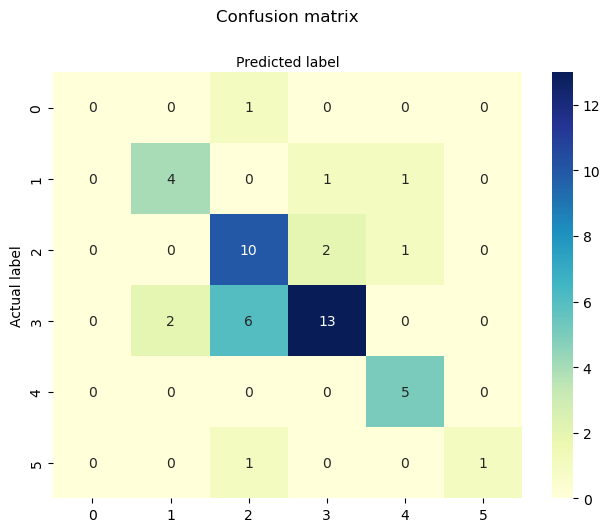

In [24]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [18]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,confusion_matrix
print("The mean_squared_error of the KNN is: {}".format(mean_squared_error(y_test, y_pred)))
print("mean_squared_log_error of the KNN is: {}".format(mean_squared_log_error(y_test, y_pred)))

The mean_squared_error of the KNN is: 0.9583333333333334
mean_squared_log_error of the KNN is: 0.1019037570454373


#### loading linear KNN model so we dont have to rerun our algorithm 